In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pylab as pl

from matplotlib import cm

from numpy import nan

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix

from pandas import read_csv

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/specolombiahackathon/202104/main/AVANZADO/adv_train_data.csv')

In [3]:
print(df.shape)

(800, 45)


In [68]:
df.fillna(df.mean(), inplace=True)
# replace empty string with NaN
df.replace(r'^\s*$', np.nan, regex=True)
# count the number of NaN values in each column
print('NaN - Fields')
df['FLUIDTYPE'] = df['FLUIDTYPE'].fillna("")
df['RECOVERY'] = df['RECOVERY'].fillna("")
print(df.isnull().sum())
# summarize the shape of the data with missing rows removed
print(df.shape)

NaN - Fields
CASENAME                 0
Depth                    0
Area                     0
RESTHICK                 0
PRESS                    0
TEMP                     0
OILGRAV                  0
SOLGOR                   0
Visco                    0
Psat                     0
Bo                       0
FLUIDTYPE                0
WATSAL                   0
Aquifer                 53
POROSITY                 0
NTG                      0
PERM                     0
CONWATER                 0
PERM.AQUIFER             0
OOIP                     0
RF                       0
RFmax                    0
Np                       0
Nw                       0
Ng                       0
Nwi                      0
GOR                      0
SWx                      0
RELPERM.RESSAT.Kro       0
RELPERM.ENDPOINT.Kro     0
RELPERM.ENDPOINT.Krw     0
RELPERM.EXPON.Kro        0
RELPERM.EXPON.Krw        0
PROD.PI                  0
WINJ.PI                  0
PROD_TIME                0
Field.OILRATE  

In [4]:
print(df['RECOVERY'].unique())

['Water Flooding' 'Primary' 'Miscible Gas Inejction' 'Non Commercial' nan
 'Polymer Flooding' 'Gas Cycling' 'Thermal']


In [5]:
conditions = [
    (df['RECOVERY'] == 'Water Flooding'),
    (df['RECOVERY'] ==  'Primary'),
    (df['RECOVERY'] ==  'Miscible Gas Inejction'), 
    (df['RECOVERY'] == 'Non Commercial'), 
    (df['RECOVERY'] == 'Polymer Flooding'),
    (df['RECOVERY'] ==  'Gas Cycling'),
    (df['RECOVERY'] ==  'Thermal')
    ]

values = [1, 2, 3, 4, 5, 6, 7]
df['recobro'] = np.select(conditions, values)

In [6]:
print(df.groupby('RECOVERY').size())

RECOVERY
Gas Cycling                17
Miscible Gas Inejction     47
Non Commercial             21
Polymer Flooding            9
Primary                   346
Thermal                     6
Water Flooding            323
dtype: int64


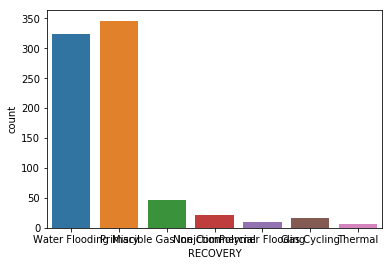

In [7]:
sns.countplot(df['RECOVERY'],label='Recobro')
plt.show()

In [67]:
print(df['FLUIDTYPE'].unique())

['Undersaturated' 'Near Saturation' 'Highly Undersaturated'
 'Full Saturated' '' 'Very Highly Undersaturated']


In [9]:
conditions = [
    (df['FLUIDTYPE'] == 'Undersaturated'),
    (df['FLUIDTYPE'] ==  'Near Saturation'),
    (df['FLUIDTYPE'] ==  'Highly Undersaturated'),
    (df['FLUIDTYPE'] ==  'Full Saturated'), 
    (df['FLUIDTYPE'] == 'Very Highly Undersaturated')
    ]

values = [1, 2, 3, 4, 5]
df['fluido'] = np.select(conditions, values)

In [178]:
print(df.groupby('FLUIDTYPE').size())

FLUIDTYPE
Full Saturated                 22
Highly Undersaturated         148
Near Saturation               180
Undersaturated                418
Very Highly Undersaturated     18
dtype: int64


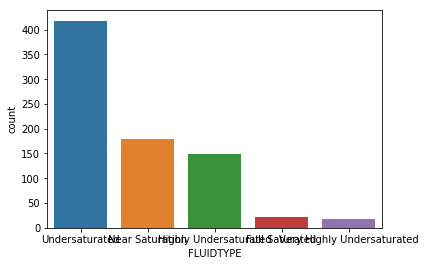

In [10]:
sns.countplot(df['FLUIDTYPE'],label='Fluido')
plt.show()

In [36]:
df.head()

CASENAME  Depth  Area  RESTHICK   PRESS   TEMP  OILGRAV  SOLGOR  Visco  \
0  43e8ea77   7310  19.5       137  3820.0  180.0     41.2  1200.0    0.3   
1  16e1320d   6420  13.1       229  3500.0  168.0     13.7    80.0   91.6   
2  3c106751   7120  14.9       255  4250.0  162.0     39.5   310.0    1.1   
3  e95ff0fb  10800  27.7        93  7040.0  241.0     43.2  2200.0    0.2   
4  b1ae336a   8490  18.8       207  3860.0  207.0     25.9   200.0    2.6   

     Psat  ...  Field.WATRATE Field.GASRATE  Field.INJWATRATE  \
0  3439.0  ...         6600.0           0.0      24900.000000   
1  1009.0  ...        43600.0           0.0      26100.000000   
2  1109.0  ...        20000.0           0.0      96600.000000   
3  6384.0  ...          300.0         200.0      40683.166904   
4  1326.0  ...        39400.0           0.0          0.000000   

  Field.INJGASRATE  NumPROD  NumWINJ     BODP_well                RECOVERY  \
0           9800.0     11.0      8.0  41923.781092          Water Flooding   
1              0.0      5.0      1.0  49129.345559                 Primary   
2              0.0     14.0     10.0  33378.988975          Water Flooding   
3           3800.0     13.0      9.0  38176.628501  Miscible Gas Inejction   
4              0.0      7.0      0.0  68328.442588                 Primary   

   recobro  fluido  
0        1       1  
1        2       2  
2        1       1  
3        3       2  
4        2       1  

[5 rows x 47 columns]

In [11]:
df.describe()

Depth        Area    RESTHICK        PRESS        TEMP  \
count    800.000000  779.000000  800.000000   787.000000  787.000000   
mean    6562.675000   20.429782  217.232500  3629.669632  175.907243   
std     3162.350814    8.837933  100.344331  1522.153253   43.707684   
min     1010.000000    2.600000   30.000000   770.000000   89.000000   
25%     3777.500000   13.650000  140.000000  2330.000000  139.500000   
50%     6740.000000   19.400000  206.000000  3650.000000  177.000000   
75%     9392.500000   26.600000  285.250000  4890.000000  213.000000   
max    11990.000000   43.300000  486.000000  9710.000000  267.000000   

          OILGRAV       SOLGOR        Visco         Psat          Bo  ...  \
count  787.000000   763.000000   752.000000   748.000000  787.000000  ...   
mean    28.241550   347.549148    38.246941  1588.189840    1.126175  ...   
std      9.459448   431.344290   191.586771  1353.199024    0.143894  ...   
min     11.500000     0.000000     0.200000     5.000000    1.016000  ...   
25%     20.100000   100.000000     1.100000   639.250000    1.047950  ...   
50%     27.700000   200.000000     3.100000  1211.500000    1.074000  ...   
75%     36.000000   400.000000    12.075000  2109.250000    1.138000  ...   
max     48.800000  3870.000000  3900.500000  8815.000000    1.943000  ...   

       Field.OILRATE  Field.WATRATE  Field.GASRATE  Field.INJWATRATE  \
count     762.000000     758.000000     670.000000        701.000000   
mean    52979.790026   62122.823219      25.671642      40683.166904   
std     47428.140939   98992.476498     105.587174      61364.541662   
min      2000.000000       0.000000       0.000000          0.000000   
25%     21000.000000    3100.000000       0.000000          0.000000   
50%     37850.000000   26400.000000       0.000000          0.000000   
75%     70750.000000   74200.000000       0.000000      64000.000000   
max    334100.000000  890200.000000    1800.000000     380100.000000   

       Field.INJGASRATE     NumPROD     NumWINJ      BODP_well     recobro  \
count        516.000000  757.000000  700.000000     590.000000  800.000000   
mean        2357.945736   18.025099    9.332857   49129.345559    1.786250   
std        12055.122379   27.711632   25.666438   29995.546183    1.143326   
min            0.000000    4.000000    0.000000    1048.205790    0.000000   
25%            0.000000    7.000000    0.000000   24419.873661    1.000000   
50%            0.000000   10.000000    1.000000   43872.991915    2.000000   
75%            0.000000   19.000000    9.250000   69045.563341    2.000000   
max       129800.000000  453.000000  335.000000  129040.991108    7.000000   

           fluido  
count  800.000000  
mean     1.750000  
std      1.014291  
min      0.000000  
25%      1.000000  
50%      1.000000  
75%      2.000000  
max      5.000000  

[8 rows x 43 columns]

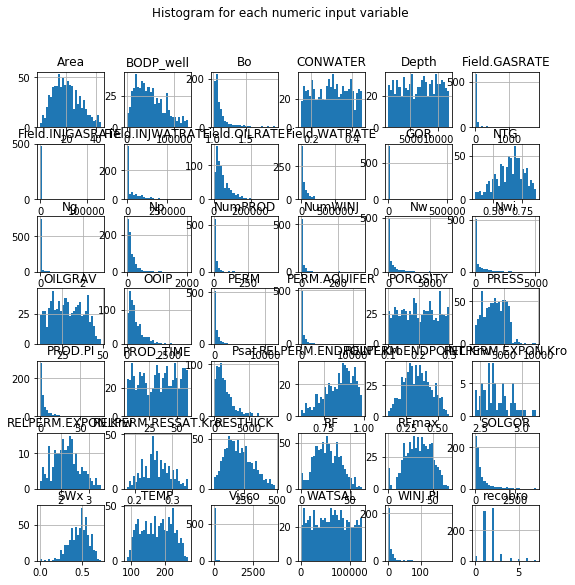

In [15]:
df.drop('fluido', axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('field_hist')
plt.show()

In [69]:
feature_names = ['OILGRAV', 'PRESS', 'Field.OILRATE', 'Field.WATRATE', 'Field.GASRATE','Field.INJWATRATE', 'Field.INJGASRATE', 'PROD.PI','WINJ.PI']
X = df[feature_names].values
y = df['RECOVERY'].values

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [71]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
classifier = KNeighborsClassifier(n_neighbors=12)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [73]:
y_pred = classifier.predict(X_test)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  0  0  0  3  0  4]
 [ 0  4  1  0  1  0  6]
 [ 0  0  2  0  0  0  4]
 [ 0  0  0  0  3  0  0]
 [ 0  0  0  0 58  0 13]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0 13  0 47]]
                        precision    recall  f1-score   support

                             0.00      0.00      0.00         7
Miscible Gas Inejction       1.00      0.33      0.50        12
        Non Commercial       0.67      0.33      0.44         6
      Polymer Flooding       0.00      0.00      0.00         3
               Primary       0.73      0.82      0.77        71
               Thermal       0.00      0.00      0.00         1
        Water Flooding       0.64      0.78      0.70        60

              accuracy                           0.69       160
             macro avg       0.43      0.32      0.35       160
          weighted avg       0.66      0.69      0.66       160

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precisio

Text(0, 0.5, 'Mean Error')

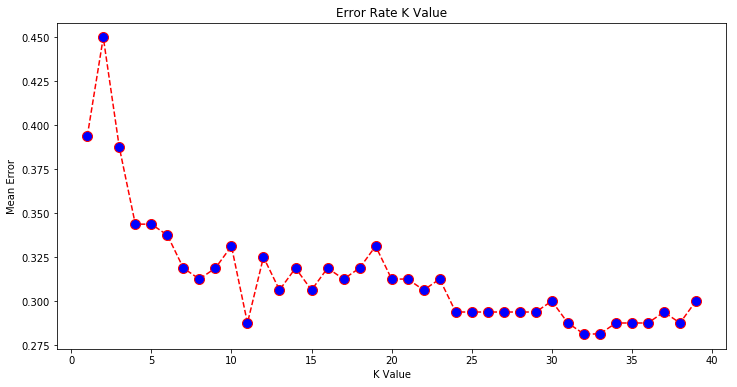

In [74]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [33]:
df.to_csv('JUAN_CEBALLOS_RECOBRO_v00.csv', index=False)

In [198]:
df.to_csv('JUAN_CEBALLOS_ANALOGOS_v00.csv', index=False)

In [83]:
feature_names = ['OILGRAV', 'PRESS', 'Field.OILRATE', 'Field.WATRATE', 'Field.GASRATE','Field.INJWATRATE', 'Field.INJGASRATE', 'PROD.PI','WINJ.PI']
X = df[feature_names]
y = df['FLUIDTYPE']
df.fillna(df.mean(), inplace=True)

[[ 0  0  1  1  0  0]
 [ 0  0  0  1  1  0]
 [ 0  0  7  3 18  0]
 [ 0  0  1 14 24  0]
 [ 0  0  8 11 68  0]
 [ 0  0  0  1  1  0]]
                            precision    recall  f1-score   support

                                 0.00      0.00      0.00         2
            Full Saturated       0.00      0.00      0.00         2
     Highly Undersaturated       0.41      0.25      0.31        28
           Near Saturation       0.45      0.36      0.40        39
            Undersaturated       0.61      0.78      0.68        87
Very Highly Undersaturated       0.00      0.00      0.00         2

                  accuracy                           0.56       160
                 macro avg       0.25      0.23      0.23       160
              weighted avg       0.51      0.56      0.52       160

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with 

Text(0, 0.5, 'Mean Error')

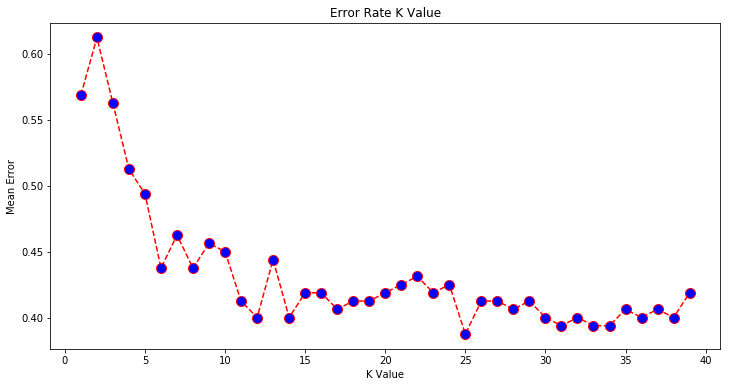

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
classifier = KNeighborsClassifier(n_neighbors=13)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [32]:
df.to_csv('JUAN_CEBALLOS_FLUIDOS_v00.csv', index=False)

In [131]:
# retrieve the numpy array
values = df.values
imputer = SimpleImputer(missing_values=nan, strategy='mean')

In [185]:
model = LinearDiscriminantAnalysis()
# define the model evaluation procedure
cv = KFold(n_splits=3, shuffle=True, random_state=1)
# evaluate the model
result = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
# report the mean performance
print('Accuracy: %.3f' % result.mean())
print(df.shape)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
dataset[[1,2,3,4,5]] = dataset[[1,2,3,4,5]].replace(0, nan)
# drop rows with missing values
dataset.dropna(inplace=True)

In [119]:
# define the imputer
imputer = SimpleImputer(missing_values=nan, strategy='mean')
# transform the dataset
transformed_values = imputer.fit_transform(values)
# count the number of NaN values in each column
print('Missing: %d' % isnan(transformed_values).sum())

ValueError: Cannot use mean strategy with non-numeric data. Received datatype :O.

In [126]:
df.drop('label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), title='Box Plot for each input variable')


ValueError: Layout of 2x2 must be larger than required size 41

In [33]:
plt.savefig('recovery_boxplot')
plt.show()

<Figure size 432x288 with 0 Axes>

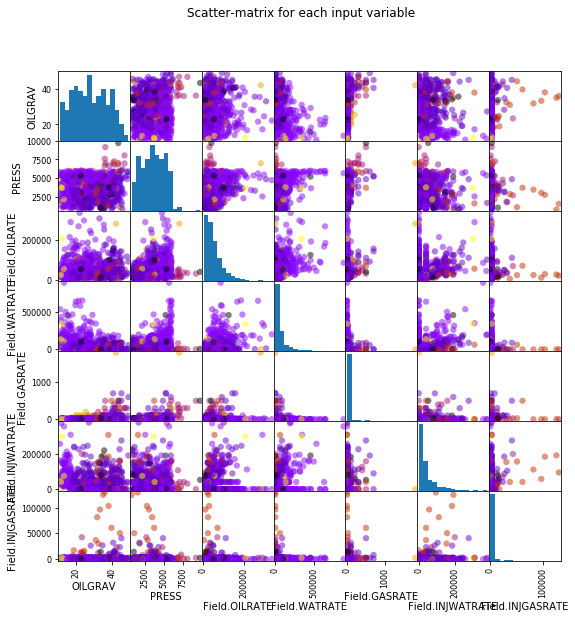

In [127]:
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('scatter_matrix')

In [36]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [24]:
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [128]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))


Accuracy of K-NN classifier on training set: 0.74
Accuracy of K-NN classifier on test set: 0.66


In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Accuracy of LDA classifier on training set: 0.86
Accuracy of LDA classifier on test set: 0.67


In [36]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.86
Accuracy of GNB classifier on test set: 0.67


In [37]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.61
Accuracy of SVM classifier on test set: 0.33


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[4 0 0 0]
 [0 1 0 0]
 [0 0 8 0]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         2

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



In [42]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()
# Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')"
    % (n_neighbors, weights))    
    plt.show()
    plot_fruit_knn(X_train, y_train, 5, 'uniform')

([<matplotlib.axis.XTick at 0x12e80fb00>,
 <a list of 5 Text xticklabel objects>)

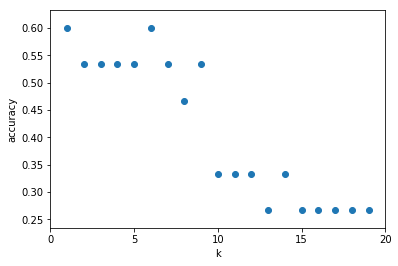

In [47]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [48]:
fruits.describe()

fruit_label        mass      width     height  color_score
count    59.000000   59.000000  59.000000  59.000000    59.000000
mean      2.542373  163.118644   7.105085   7.693220     0.762881
std       1.208048   55.018832   0.816938   1.361017     0.076857
min       1.000000   76.000000   5.800000   4.000000     0.550000
25%       1.000000  140.000000   6.600000   7.200000     0.720000
50%       3.000000  158.000000   7.200000   7.600000     0.750000
75%       4.000000  177.000000   7.500000   8.200000     0.810000
max       4.000000  362.000000   9.600000  10.500000     0.930000

In [54]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches

X = fruits[['mass', 'width', 'height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'width']].as_matrix()
    y_mat = y.as_matrix()

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

        
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    
    plt.show()

In [53]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.53


In [57]:
fruits.head

<bound method NDFrame.head of     fruit_label fruit_name     fruit_subtype  mass  width  height  color_score
0             1      apple      granny_smith   192    8.4     7.3         0.55
1             1      apple      granny_smith   180    8.0     6.8         0.59
2             1      apple      granny_smith   176    7.4     7.2         0.60
3             2   mandarin          mandarin    86    6.2     4.7         0.80
4             2   mandarin          mandarin    84    6.0     4.6         0.79
5             2   mandarin          mandarin    80    5.8     4.3         0.77
6             2   mandarin          mandarin    80    5.9     4.3         0.81
7             2   mandarin          mandarin    76    5.8     4.0         0.81
8             1      apple          braeburn   178    7.1     7.8         0.92
9             1      apple          braeburn   172    7.4     7.0         0.89
10            1      apple          braeburn   166    6.9     7.3         0.93
11            1      a